## Exploratory Data Analysis — Credit Risk Dataset

Notebook to load, inspect, visualize, and perform basic preprocessing for the credit risk dataset.


### Introduction

This notebook performs an initial EDA: data loading, inspection of types and missingness, basic cleaning, visualizations, correlation analysis, and simple encoding for modeling.


### 1. Data Loading

Import required libraries and load the dataset using the project's utility function.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path

sys.path.insert(0, str(Path().resolve().parent))
from src.utils import load_data

In [2]:
credit_risk_df = load_data()

### 2. Preliminary Inspection
 
Check shape, column names, dtypes and missing values.

In [3]:
print("Dataset shape:", credit_risk_df.shape)
print("\nColumns:\n", credit_risk_df.columns)
print("\nData types:\n", credit_risk_df.dtypes)
print("\nMissing values:\n", credit_risk_df.isnull().sum())

Dataset shape: (954, 11)

Columns:
 Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose',
       'Credit Risk'],
      dtype='object')

Data types:
 Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Credit Risk          int64
dtype: object

Missing values:
 Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     175
Checking account    378
Credit amount         0
Duration              0
Purpose               0
Credit Risk           0
dtype: int64


In [4]:
credit_risk_df.describe(include='all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
count,954.000000,954.000000,954,954.000000,954,779,576,954.000000,954.000000,954,954.000000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,NaN
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,NaN
freq,NaN,NaN,656,NaN,680,576,261,NaN,NaN,322,NaN
mean,476.500000,35.501048,NaN,1.909853,NaN,NaN,NaN,3279.112159,20.780922,NaN,1.302935
std,275.540378,11.379668,NaN,0.649681,NaN,NaN,NaN,2853.315158,12.046483,NaN,0.459768
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,1.000000
25%,238.250000,27.000000,NaN,2.000000,NaN,NaN,NaN,1360.250000,12.000000,NaN,1.000000
50%,476.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2302.500000,18.000000,NaN,1.000000
75%,714.750000,42.000000,NaN,2.000000,NaN,NaN,NaN,3975.250000,24.000000,NaN,2.000000


### 3. Cleaning and Feature Selection
 
Drop unneeded index column and identify categorical vs numeric columns.

In [5]:
credit_risk_df = credit_risk_df.drop(credit_risk_df.columns[0], axis=1)
credit_risk_df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Credit Risk'],
      dtype='object')

In [6]:
target_col = "Credit Risk"

categorical_cols = credit_risk_df.select_dtypes(include=['object']).columns
numeric_cols = credit_risk_df.select_dtypes(include=["int64", "float64"]).columns

In [7]:
credit_risk_df[categorical_cols] = credit_risk_df[categorical_cols].fillna('Unknown')

### 4. Exploratory Visualizations
 
Plot target distribution, categorical counts, numeric distributions, and correlation heatmap.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")   # bigger fonts for presentation
plt.rcParams["figure.figsize"] = (10, 6)

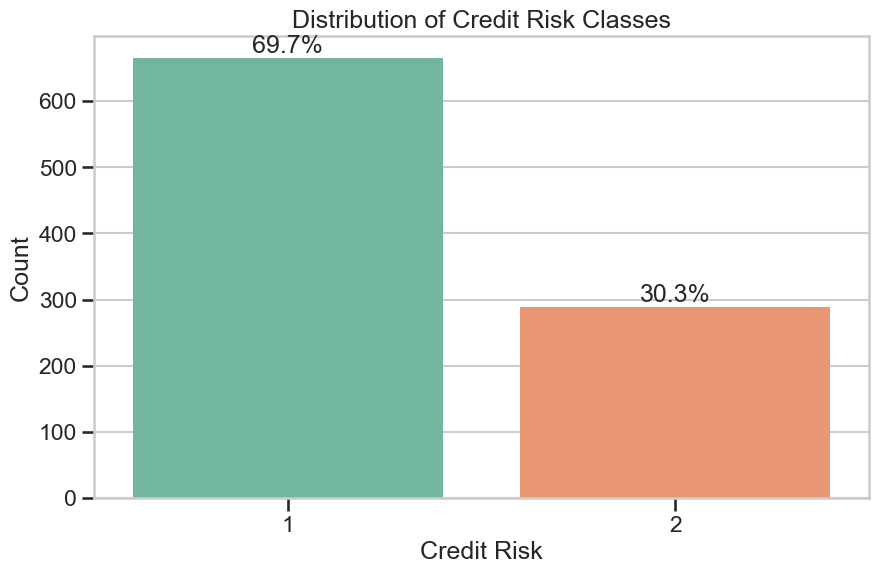

In [9]:
ax = sns.countplot(x=credit_risk_df["Credit Risk"], palette="Set2")

# Add percentages
total = len(credit_risk_df)
for p in ax.patches:
    percentage = f"{100 * p.get_height()/total:.1f}%"
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title("Distribution of Credit Risk Classes")
plt.xlabel("Credit Risk")
plt.ylabel("Count")
plt.show()


### Insight

- The dataset shows a **class imbalance** between good and bad credit risk.

Business Impact:
Imbalanced datasets may cause the model to favor low-risk approvals, 
potentially increasing financial losses from high-risk customers.


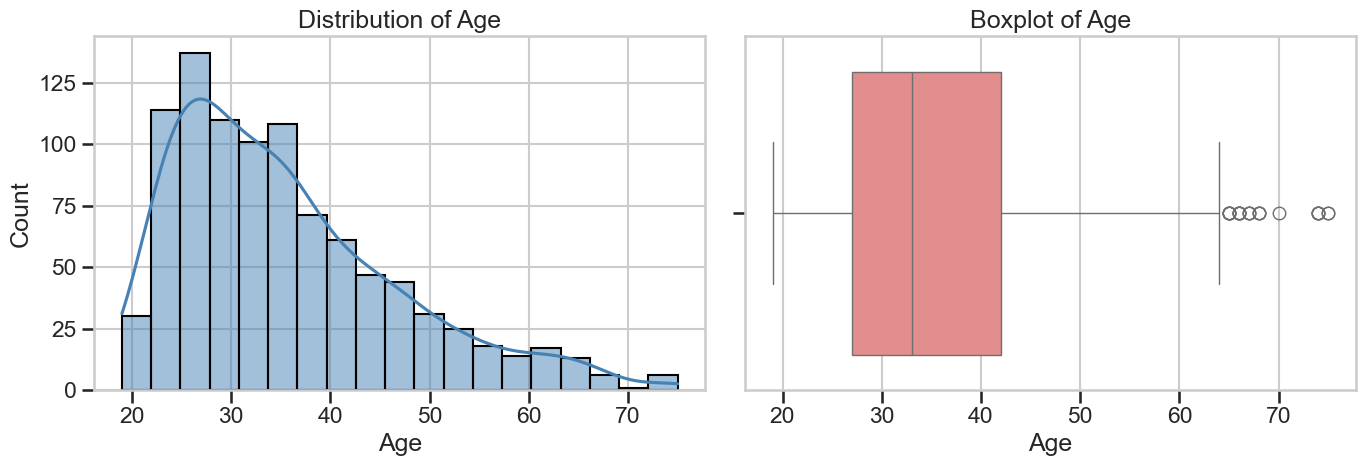

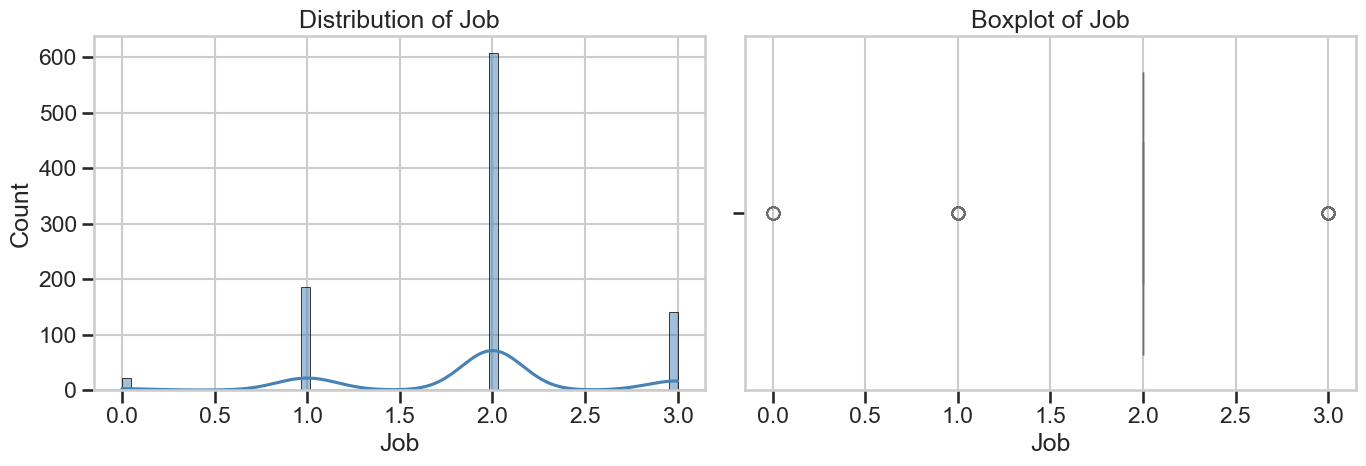

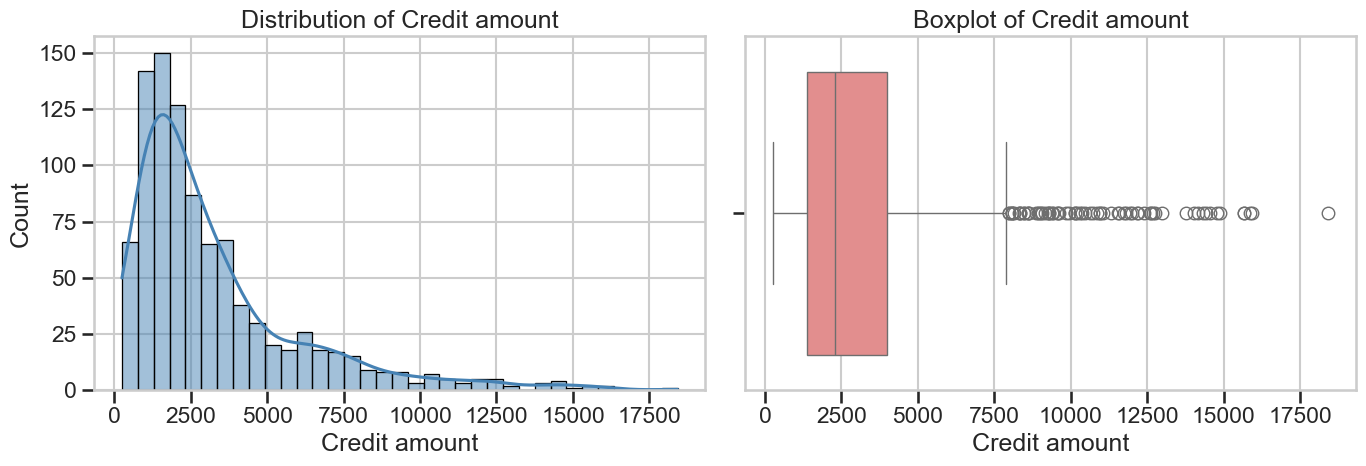

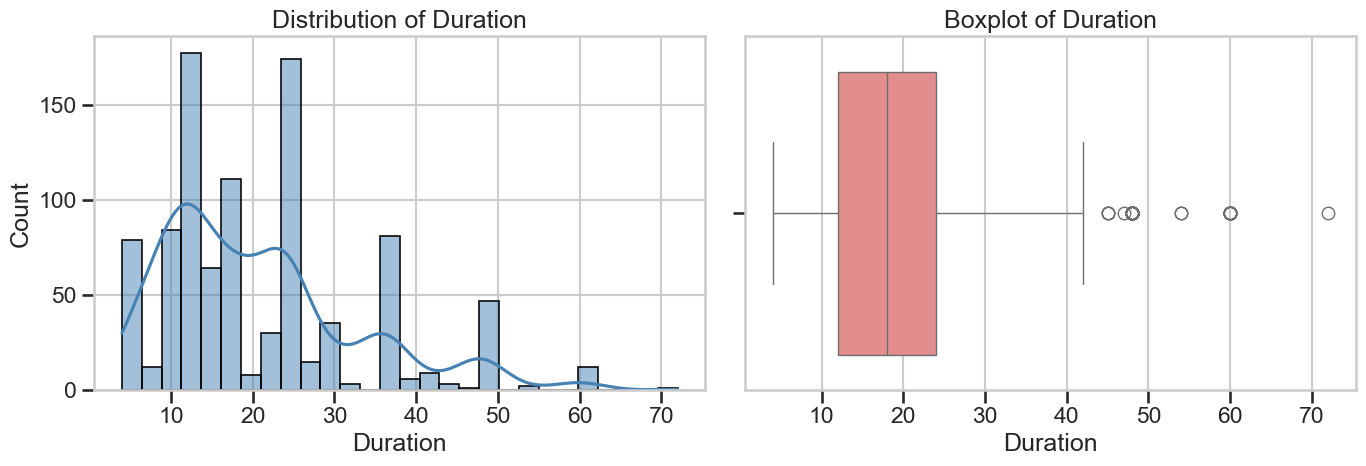

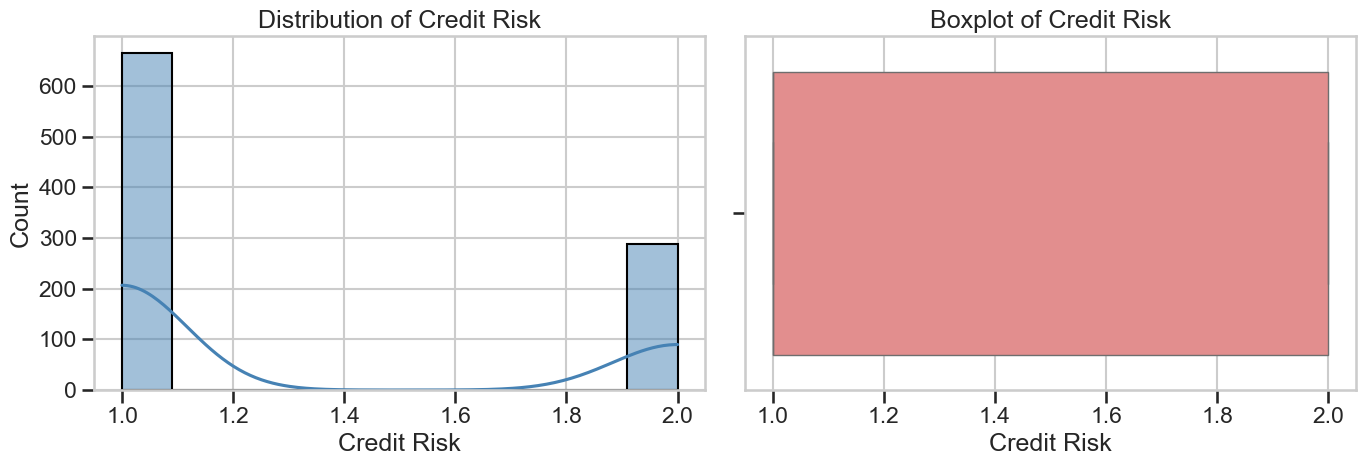

In [10]:
for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    
    sns.histplot(credit_risk_df[col], kde=True, ax=ax[0], color="steelblue")
    ax[0].set_title(f"Distribution of {col}")
    
    sns.boxplot(x=credit_risk_df[col], ax=ax[1], color="lightcoral")
    ax[1].set_title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()


### Insight

- Several numerical features appear **right-skewed**, indicating high-value outliers.
- Boxplots confirm presence of extreme values in features such as loan amount or duration.
- Skewed variables may require:
  - Log transformation
  - Robust scaling
  - Outlier treatment

Business Impact:
Outliers may represent high-loan customers — removing them blindly could remove valuable risk information.


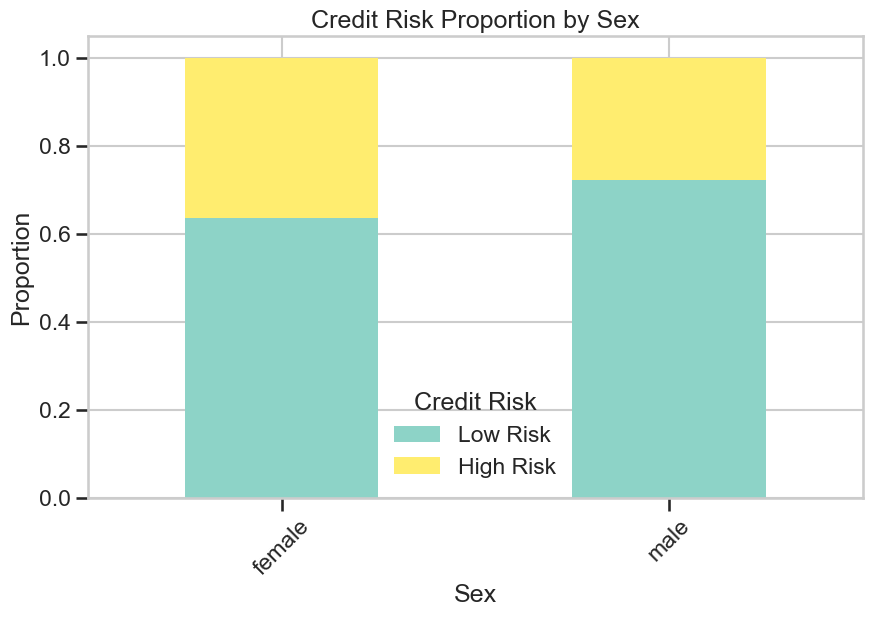

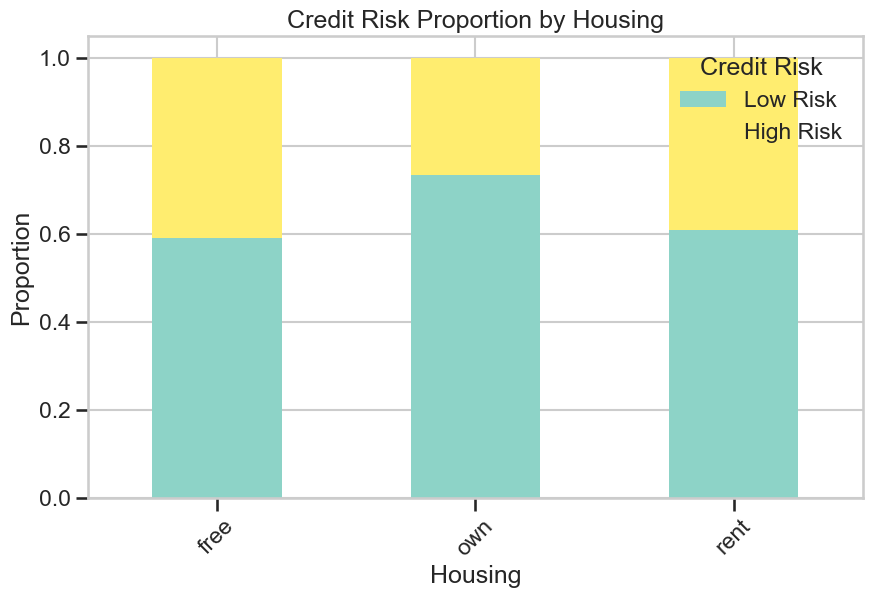

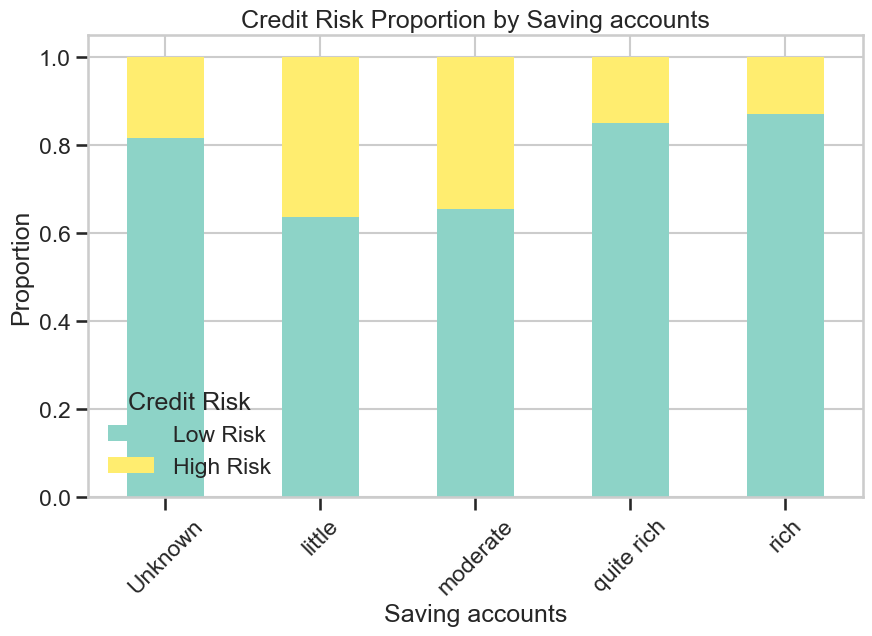

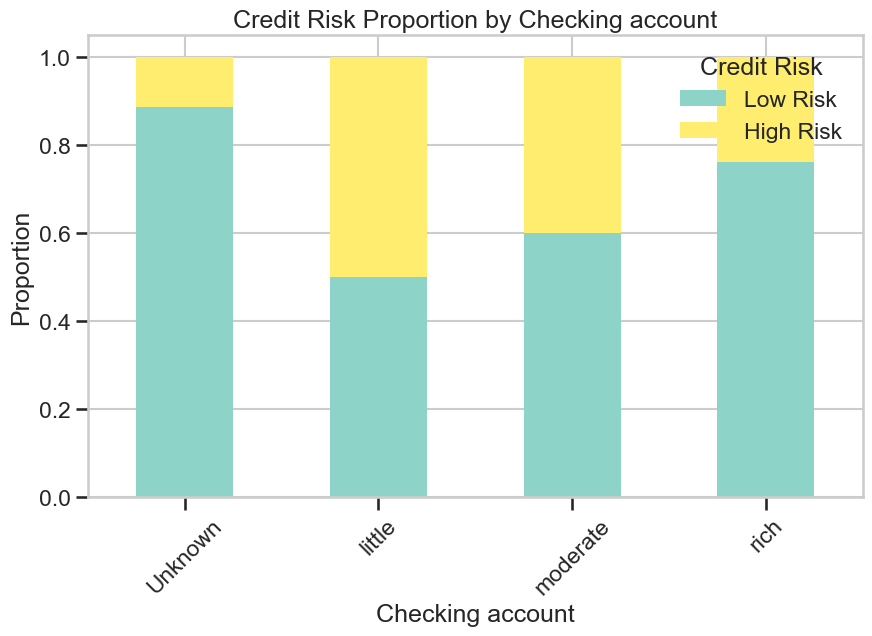

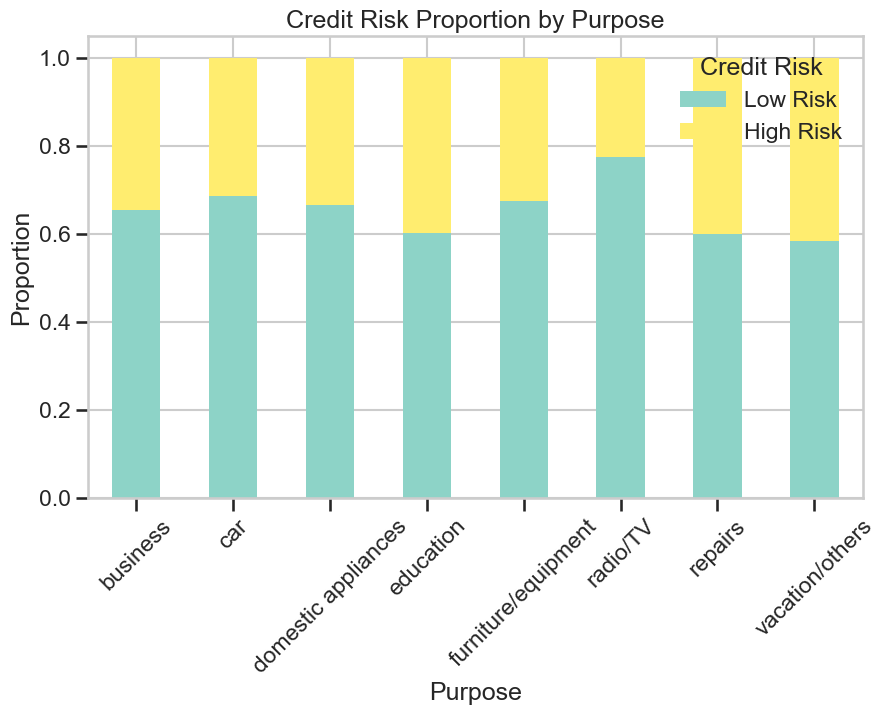

In [11]:
for col in categorical_cols.to_list():
    if col != "Credit Risk":
        cross_tab = pd.crosstab(credit_risk_df[col], credit_risk_df["Credit Risk"], normalize="index")
        cross_tab.columns = ['Low Risk', 'High Risk']
        cross_tab.plot(kind="bar", stacked=True, colormap="Set3")
        plt.title(f"Credit Risk Proportion by {col}")
        plt.ylabel("Proportion")
        plt.legend(title="Credit Risk")
        plt.xticks(rotation=45)
        plt.show()


### Insight

- Certain categories show **higher proportion of bad credit risk**.
- Some categories are strong predictors and may carry high discriminatory power.
- Rare categories may need grouping to prevent overfitting.

Business Impact:
Customer attributes such as employment type, housing status, or loan purpose 
may significantly influence default probability.

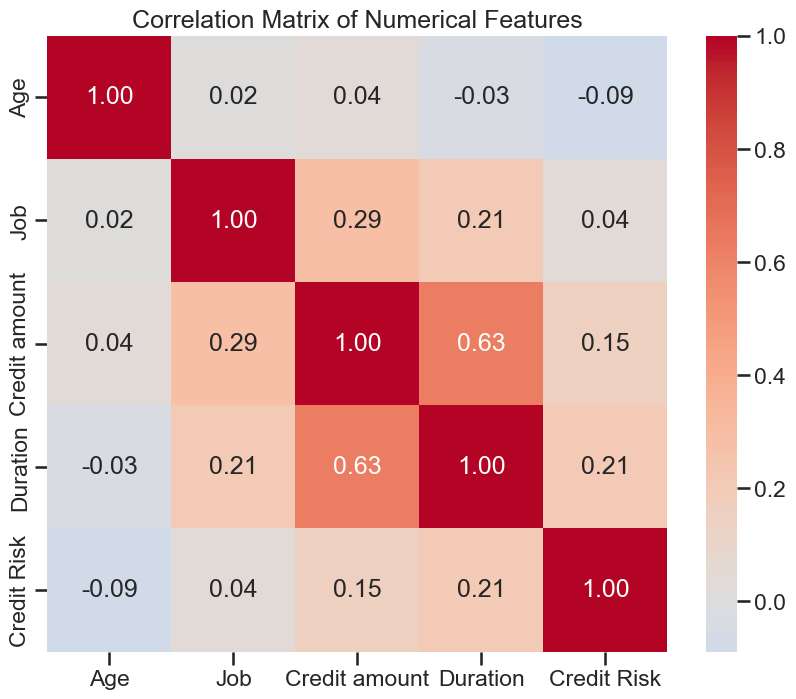

In [12]:
corr = credit_risk_df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Insight

- Most numerical features show weak to moderate correlations.
- No severe multicollinearity detected (no correlation > 0.85).
- Features with moderate correlation may contribute redundant information.

Business Impact:
Low multicollinearity improves model stability and interpretability.

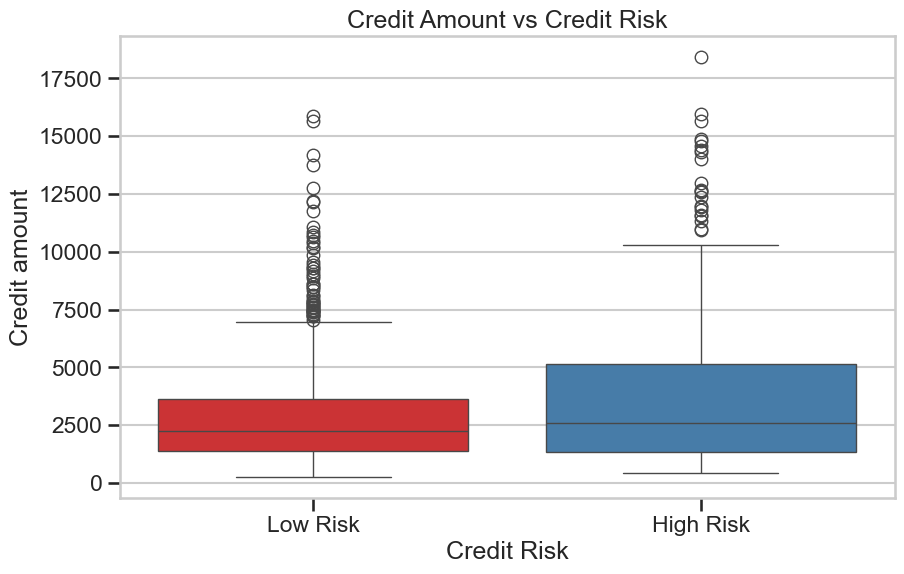

In [13]:
sns.boxplot(x="Credit Risk", y="Credit amount", data=credit_risk_df, palette="Set1")
plt.xticks([0, 1], ['Low Risk', 'High Risk'])
plt.title("Credit Amount vs Credit Risk")
plt.show()

### Insight

- Higher credit amounts may show greater variability in bad credit cases.
- If median credit amount is higher for bad risk,
  it suggests large credit increase default probability.

Business Impact:
Credit Amount size is a critical feature in risk scoring.
Financial institutions may tighten approval criteria for high-value credits.

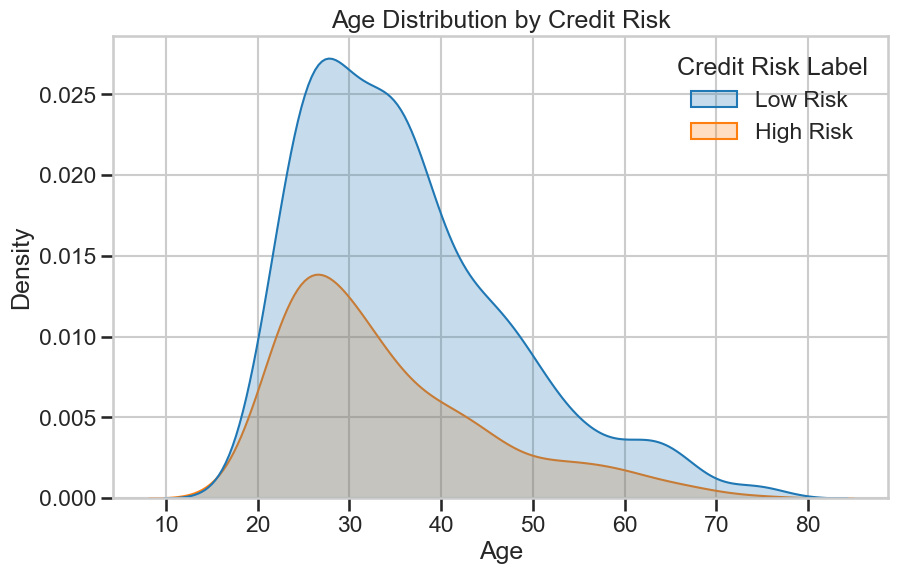

In [14]:
df_tmp = credit_risk_df.copy()
df_tmp['Credit Risk Label'] = df_tmp[target_col].map({1: 'Low Risk', 2: 'High Risk'})
sns.kdeplot(data=df_tmp, x="Age", hue="Credit Risk Label", fill=True)
plt.title("Age Distribution by Credit Risk")
plt.show()

### Insight

- Risk patterns across age groups may reveal:
  - Younger customers being riskier (less credit history)
  - Or older customers having higher financial burden

Age-based patterns must be handled carefully to avoid bias and regulatory issues.

# Final EDA Summary

Key Findings:

1. The dataset shows moderate class imbalance.
2. Several numerical variables are skewed and contain outliers.
3. Some categorical features show strong association with credit risk.
4. No extreme multicollinearity among numerical features.
5. Loan amount appears to be an important predictor.

Next Steps:

- Perform feature engineering
- Encode categorical variables properly
- Apply scaling for numerical features
- Handle class imbalance
- Train baseline models (Logistic Regression, Random Forest)
